In [130]:
%pip install ccxt
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\msnin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\msnin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [131]:
import ccxt
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import datetime
import calendar
import numpy as np

In [132]:
def fetch_historical_data(exchange, symbol, timeframe, since):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['date'] = df['timestamp'].dt.strftime('%m-%d-%y')
    df = df.tail(90) #used to select only the last 90 days of entries into the DF
    return df

In [133]:
#   api key stuff
api_key = 'Z6bH9gXJ7UllNhBuj0'
api_secret = 'gtajv8bMci1T3BIEmTMzgS4PQU5IECuFWqKz'
exchange = ccxt.bybit({'apiKey': api_key, 'secret': api_secret})

#   asset and timeframe
symbol = 'BTCUSDT'
timeframe = '5m'
days = 90
n = math.ceil(12*24*90/1000)

In [134]:
# get today's date and subtract 90 days
today = datetime.datetime.utcnow()
day_90 = today - datetime.timedelta(days)
day_90_midnight = datetime.datetime(day_90.year, day_90.month, day_90.day, 0, 0, 0)
since = int(calendar.timegm(day_90_midnight.utctimetuple()) * 1000) 

# Fetch historical dataa
def create_df(since):
    limit = 12*24*90
    historical_data = exchange.fetch_ohlcv(symbol, timeframe, since = since, limit = limit)

    # Convert data to DataFrame
    df = pd.DataFrame(historical_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df


In [135]:
since_timestamp_list = [since]
# n = math.ceil(12*24*90/1000)
df_big = pd.DataFrame()

for i in range(n):
    df = create_df(since)
    df_big = pd.concat([df_big, df], ignore_index=True)
    since = int((df['timestamp'].max().timestamp() * 1000))
    since_timestamp_list.append(since)

# initial weekend and weekday data set
weekdays_data = df_big[df_big['timestamp'].dt.weekday < 5]  # Monday to Friday
weekends_data = df_big[df_big['timestamp'].dt.weekday >= 5]  # Saturday and Sunday

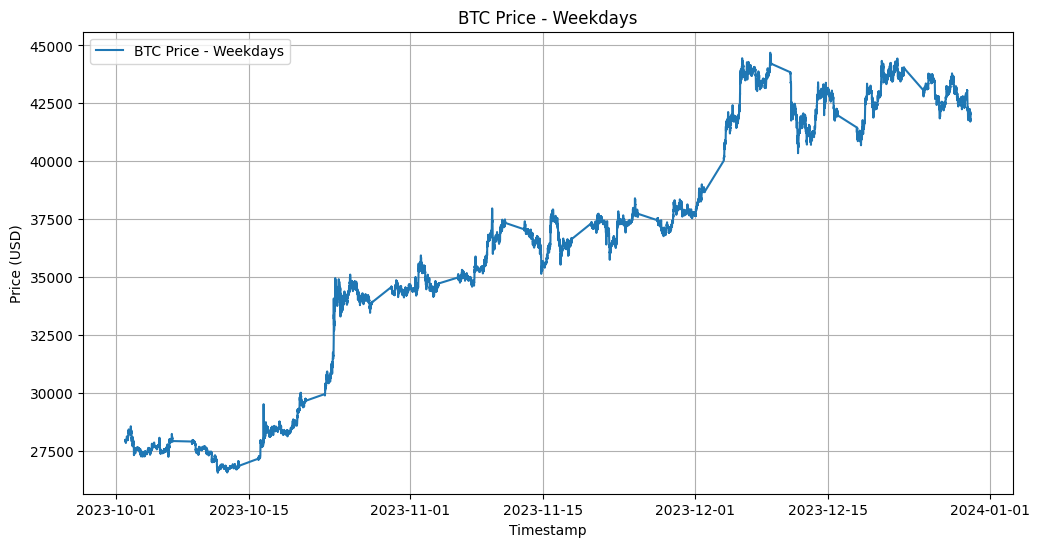

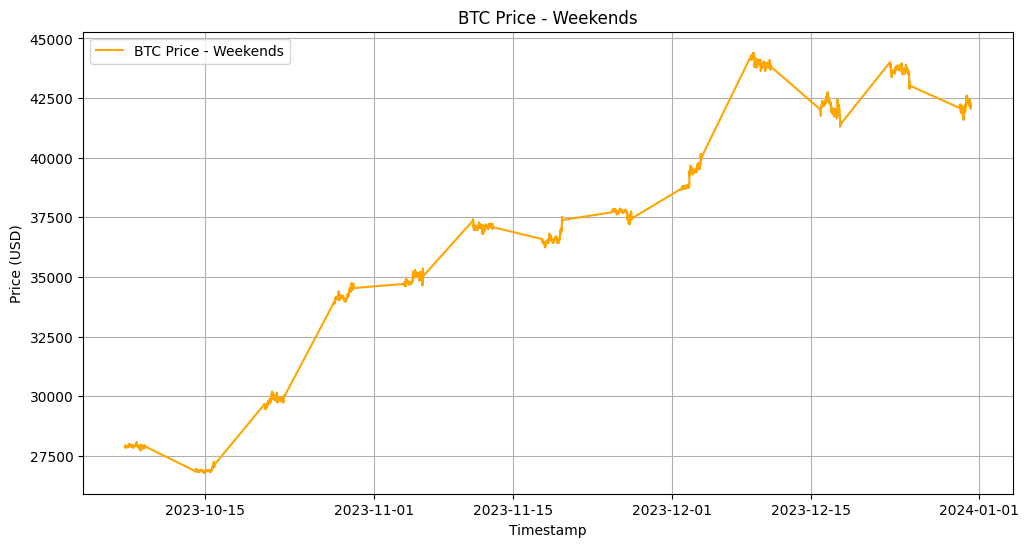

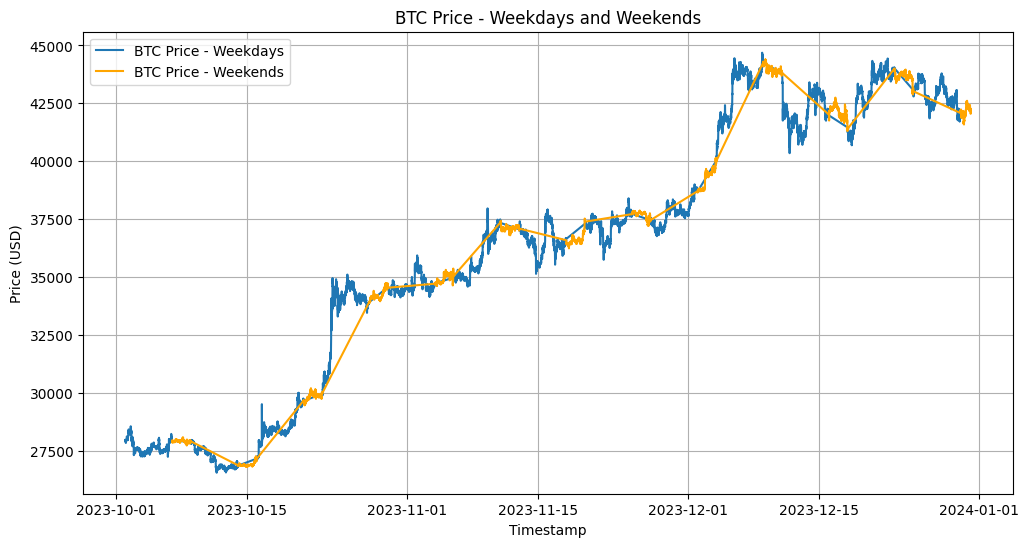

In [136]:
# Plot for weekdays
plt.figure(figsize=(12, 6))
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')
plt.title('BTC Price - Weekdays')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends
plt.figure(figsize=(12, 6))
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')
plt.title('BTC Price - Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#overaly both
plt.figure(figsize=(12, 6))

# Plot weekdays_data
plt.plot(weekdays_data['timestamp'], weekdays_data['close'], label='BTC Price - Weekdays')

# Plot weekends_data
plt.plot(weekends_data['timestamp'], weekends_data['close'], label='BTC Price - Weekends', color='orange')

plt.title('BTC Price - Weekdays and Weekends')
plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()